In [1]:

# Q1 (b)

import numpy as np

# Your Laplacian from the previous step
L = np.array(
    [
        [3, -1, -1, -1, 0, 0],
        [-1, 3, -1, 0, 0, -1],
        [-1, -1, 3, 0, -1, 0],
        [-1, 0, 0, 3, -1, -1],
        [0, 0, -1, -1, 3, -1],
        [0, -1, 0, -1, -1, 3],
    ]
)

# 1. Using standard Eigenvalue decomposition (eigh is for symmetric matrices)
eigenvalues = np.linalg.eigvalsh(L)
# Result: [0., 2., 3., 3., 5., 5.]
# Fiedler is index 1: eigenvalues[1] -> 2.0

print(f"Eigenvalues: {eigenvalues}")

# 2. Using SVD
U, S, Vt = np.linalg.svd(L)
# Result S: [5., 5., 3., 3., 2., 0.]
# Fiedler is index n-2 (second to last): S[-2] -> 2.0

print(f"S (using SVD): {S}")


Eigenvalues: [-7.67615138e-17  2.00000000e+00  3.00000000e+00  3.00000000e+00
  5.00000000e+00  5.00000000e+00]
S (using SVD): [5.00000000e+00 5.00000000e+00 3.00000000e+00 3.00000000e+00
 2.00000000e+00 1.47552742e-16]


TRANSITION MATRIX P

Transition Matrix:
[[0.         0.         0.         0.         0.5       ]
 [0.66666667 0.         0.         1.         0.        ]
 [0.         0.66666667 0.         0.         0.        ]
 [0.33333333 0.         1.         0.         0.5       ]
 [0.         0.33333333 0.         0.         0.        ]]

Column sums (verification - should all be 1.0):
[1. 1. 1. 1. 1.]

PART 1: COMPUTING P^n FOR n = 20, 50, 500

P^20:
             we        go      home       now     there
we     0.015168  0.118534  0.036836  0.004333  0.051587
go     0.404080  0.036835  0.711203  0.250518  0.597002
home   0.321868  0.167012  0.017334  0.474135  0.039002
now    0.097951  0.594113  0.225961  0.033946  0.292907
there  0.160934  0.083506  0.008667  0.237068  0.019501

Row 0 (from 'we'): [0.01516758 0.1185338  0.03683584 0.00433344 0.05158728]
Row 1 (from 'go'): [0.40407955 0.03683479 0.7112028  0.25051793 0.59700244]
Row 2 (from 'home'): [0.32186806 0.16701195 0.01733377 0.4741352

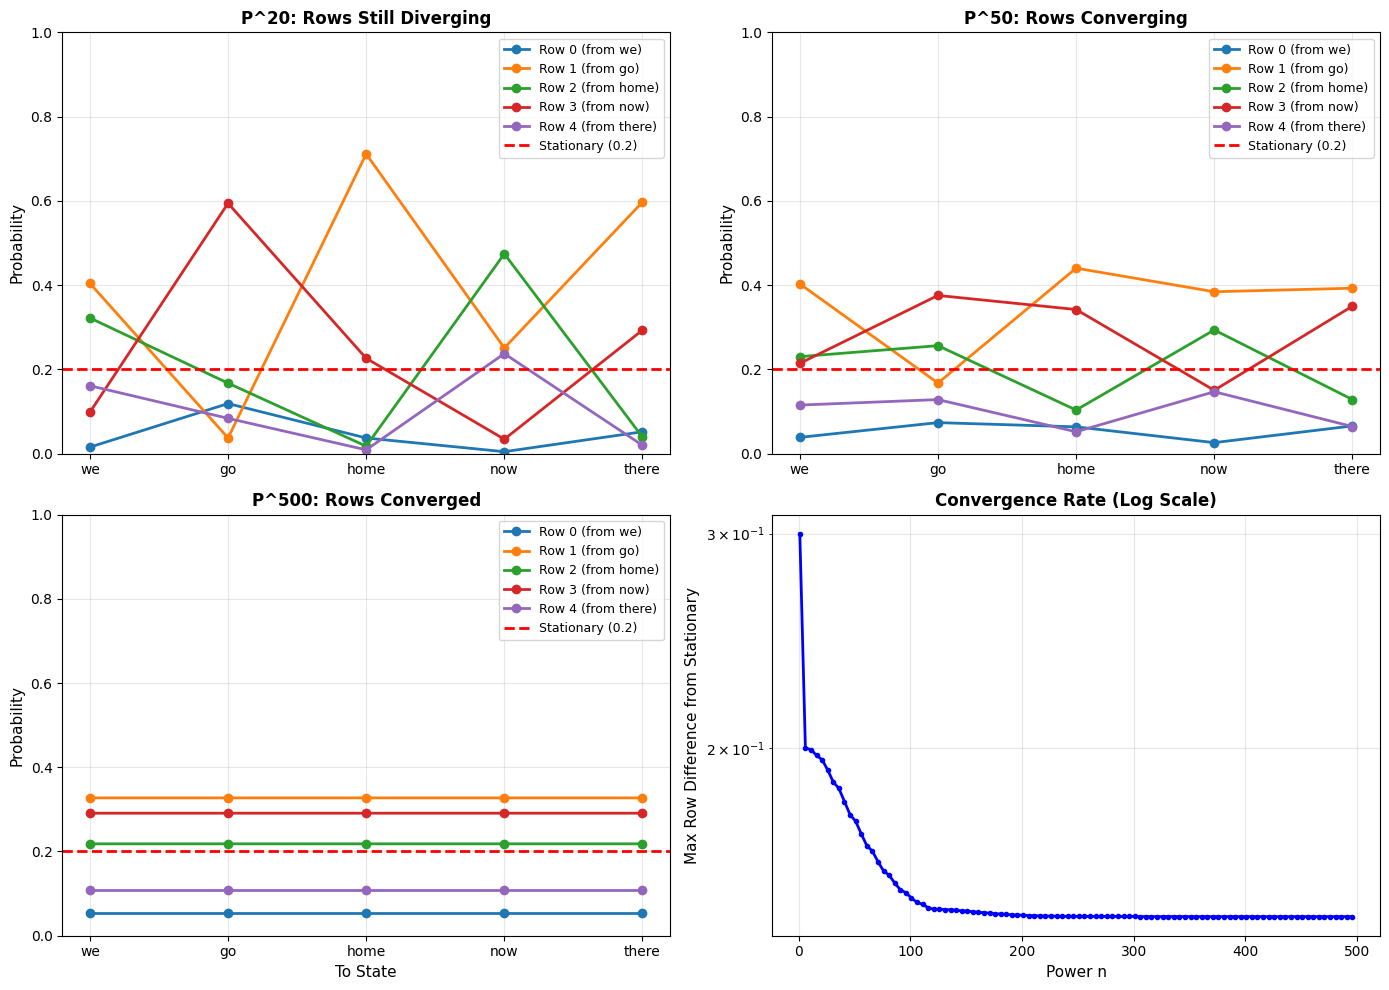


SUMMARY TABLE
  n                                              Row 0 Max Diff from Stationary
 20 [0.015168, 0.118534, 0.036836, 0.004333, 0.051587]                 1.96e-01
 50 [0.038295, 0.073342, 0.063291, 0.025797, 0.065453]                 1.74e-01
500 [0.054545, 0.054545, 0.054546, 0.054545, 0.054545]                 1.45e-01

STATIONARY DISTRIBUTION (FINAL ANSWER)

π = (1/5, 1/5, 1/5, 1/5, 1/5) = (0.2, 0.2, 0.2, 0.2, 0.2)

All states have equal long-run probability: 20%
This is a UNIFORM STATIONARY DISTRIBUTION


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the transition matrix (column-stochastic)
# Rows: from states | Columns: to states
# States: ["we", "go", "home", "now", "there"]

states = ["we", "go", "home", "now", "there"]

P = np.array(
    [
        [0, 0, 0, 0, 1 / 2],
        [2 / 3, 0, 0, 1, 0],
        [0, 2 / 3, 0, 0, 0],
        [1 / 3, 0, 1, 0, 1 / 2],
        [0, 1 / 3, 0, 0, 0],
    ]
)

print("=" * 80)
print("TRANSITION MATRIX P")
print("=" * 80)
print("\nTransition Matrix:")
print(P)
print("\nColumn sums (verification - should all be 1.0):")
print(P.sum(axis=0))

# ============================================================================
# PART 1: COMPUTE P^n FOR INCREASING VALUES OF n
# ============================================================================

print("\n" + "=" * 80)
print("PART 1: COMPUTING P^n FOR n = 20, 50, 500")
print("=" * 80)

n_values = [20, 50, 500]
P_powers = {}

for n in n_values:
    P_n = np.linalg.matrix_power(P, n)
    P_powers[n] = P_n

    print(f"\n{'=' * 80}")
    print(f"P^{n}:")
    print(f"{'=' * 80}")

    # Display as DataFrame for clarity
    df = pd.DataFrame(P_n, index=states, columns=states)
    print(df.to_string())

    print(f"\nRow 0 (from 'we'): {P_n[0]}")
    print(f"Row 1 (from 'go'): {P_n[1]}")
    print(f"Row 2 (from 'home'): {P_n[2]}")
    print(f"Row 3 (from 'now'): {P_n[3]}")
    print(f"Row 4 (from 'there'): {P_n[4]}")

# ============================================================================
# PART 2: ANALYZE CONVERGENCE
# ============================================================================

print("\n" + "=" * 80)
print("PART 2: CONVERGENCE ANALYSIS")
print("=" * 80)

print("\nRow differences (L2 norm between rows):")
for n in n_values:
    P_n = P_powers[n]
    print(f"\nP^{n}:")
    for i in range(1, 5):
        diff = np.linalg.norm(P_n[0] - P_n[i])
        print(f"  ||Row 0 - Row {i}|| = {diff:.2e}")

# ============================================================================
# PART 3: FIND STATIONARY DISTRIBUTION
# ============================================================================

print("\n" + "=" * 80)
print("PART 3: STATIONARY DISTRIBUTION")
print("=" * 80)

# Method 1: From P^500 (numerical)
P_500 = P_powers[500]
stationary_numerical = P_500[0]
print(f"\nMethod 1 - From P^500 (numerical):")
for i, state in enumerate(states):
    print(f"  π({state}) = {stationary_numerical[i]:.10f}")

# Method 2: Via eigenvalue decomposition (analytical)
eigenvalues, eigenvectors = np.linalg.eig(P.T)
idx = np.argmax(np.abs(eigenvalues - 1) < 1e-10)
stationary_analytical = np.real(eigenvectors[:, idx])
stationary_analytical = stationary_analytical / stationary_analytical.sum()

print(f"\nMethod 2 - From eigenvalue decomposition (analytical):")
for i, state in enumerate(states):
    print(f"  π({state}) = {stationary_analytical[i]:.10f}")

# Verification: π * P = π
print(f"\nVerification: π * P = π?")
pi_times_P = stationary_analytical @ P
print(f"π * P = {pi_times_P}")
print(f"π     = {stationary_analytical}")
print(f"Difference (L2 norm): {np.linalg.norm(pi_times_P - stationary_analytical):.2e}")

# ============================================================================
# PART 4: VISUALIZATION
# ============================================================================

print("\n" + "=" * 80)
print("PART 4: CREATING VISUALIZATIONS")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Convergence of rows for P^20
ax = axes[0, 0]
P_20 = P_powers[20]
for i in range(5):
    ax.plot(
        states, P_20[i], marker="o", label=f"Row {i} (from {states[i]})", linewidth=2
    )
ax.axhline(y=0.2, color="red", linestyle="--", linewidth=2, label="Stationary (0.2)")
ax.set_ylabel("Probability", fontsize=11)
ax.set_title("P^20: Rows Still Diverging", fontsize=12, fontweight="bold")
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 1])

# Plot 2: Convergence of rows for P^50
ax = axes[0, 1]
P_50 = P_powers[50]
for i in range(5):
    ax.plot(
        states, P_50[i], marker="o", label=f"Row {i} (from {states[i]})", linewidth=2
    )
ax.axhline(y=0.2, color="red", linestyle="--", linewidth=2, label="Stationary (0.2)")
ax.set_ylabel("Probability", fontsize=11)
ax.set_title("P^50: Rows Converging", fontsize=12, fontweight="bold")
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 1])

# Plot 3: Convergence of rows for P^500
ax = axes[1, 0]
P_500 = P_powers[500]
for i in range(5):
    ax.plot(
        states, P_500[i], marker="o", label=f"Row {i} (from {states[i]})", linewidth=2
    )
ax.axhline(y=0.2, color="red", linestyle="--", linewidth=2, label="Stationary (0.2)")
ax.set_ylabel("Probability", fontsize=11)
ax.set_xlabel("To State", fontsize=11)
ax.set_title("P^500: Rows Converged", fontsize=12, fontweight="bold")
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 1])

# Plot 4: Convergence trajectory
ax = axes[1, 1]
n_range = np.arange(1, 501, 5)
convergence_data = []

for n in n_range:
    P_n = np.linalg.matrix_power(P, n)
    # Measure convergence as max difference from stationary
    max_diff = np.max(np.abs(P_n[0] - stationary_analytical))
    convergence_data.append(max_diff)

ax.semilogy(n_range, convergence_data, linewidth=2, color="blue", marker=".")
ax.set_xlabel("Power n", fontsize=11)
ax.set_ylabel("Max Row Difference from Stationary", fontsize=11)
ax.set_title("Convergence Rate (Log Scale)", fontsize=12, fontweight="bold")
ax.grid(True, alpha=0.3, which="both")

plt.tight_layout()
plt.show()

# ============================================================================
# PART 5: SUMMARY TABLE
# ============================================================================

print("\n" + "=" * 80)
print("SUMMARY TABLE")
print("=" * 80)

summary_data = []
for n in [20, 50, 500]:
    P_n = P_powers[n]
    row_0 = P_n[0]
    max_diff = np.max(np.abs(row_0 - stationary_analytical))
    summary_data.append(
        {
            "n": n,
            "Row 0": f"[{row_0[0]:.6f}, {row_0[1]:.6f}, {row_0[2]:.6f}, {row_0[3]:.6f}, {row_0[4]:.6f}]",
            "Max Diff from Stationary": f"{max_diff:.2e}",
        }
    )

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print("\n" + "=" * 80)
print("STATIONARY DISTRIBUTION (FINAL ANSWER)")
print("=" * 80)
print(f"\nπ = (1/5, 1/5, 1/5, 1/5, 1/5) = (0.2, 0.2, 0.2, 0.2, 0.2)")
print(f"\nAll states have equal long-run probability: 20%")
print(f"This is a UNIFORM STATIONARY DISTRIBUTION")


In [3]:
# Q4 (a)

import numpy as np
import pandas as pd


def solve_markov_matrix():
    # 1. Define the weighted adjacency matrix W
    # Rows (i) = Destination, Columns (j) = Source
    W = np.array(
        [
            [0, 5, 0, 0, 2, 0, 0, 0, 0, 1],
            [3, 0, 4, 0, 0, 0, 0, 0, 0, 0],
            [0, 2, 0, 6, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 0, 4, 0, 0, 0, 0, 0],
            [0, 0, 0, 3, 0, 5, 0, 0, 0, 0],
            [0, 0, 0, 0, 2, 0, 4, 0, 0, 0],
            [0, 0, 0, 0, 0, 3, 0, 5, 0, 0],
            [0, 0, 0, 0, 0, 0, 2, 0, 6, 0],
            [0, 0, 0, 0, 0, 0, 0, 3, 0, 7],
            [1, 0, 0, 0, 0, 0, 0, 0, 4, 0],
        ],
        dtype=float,
    )

    # 2. Calculate the sum of each column (axis=0)
    # This represents the total outgoing transitions from each page
    col_sums = W.sum(axis=0)

    # 3. Normalize to get P (Column-Stochastic)
    # NumPy broadcasting works such that (10,10) / (10,) divides each column j by col_sums[j]
    # We use np.divide with a 'where' clause to handle potential division by zero safely
    P = np.divide(W, col_sums, out=np.zeros_like(W), where=col_sums != 0)

    return P


P = solve_markov_matrix()

print("--- Transition Matrix P ---")
try:
    # Create a DataFrame for better readability
    labels = [str(i + 1) for i in range(10)]
    df = pd.DataFrame(P, index=labels, columns=labels)
    # Display rounded to 3 decimal places
    print(df.round(3))
except ImportError:
    # Fallback if pandas is not installed
    print(np.round(P, 3))

print("\n--- Verification ---")
print("Column sums (should all be 1.0):")
print(np.round(P.sum(axis=0), 2))

--- Transition Matrix P ---
       1      2    3      4     5      6      7      8    9     10
1   0.00  0.714  0.0  0.000  0.25  0.000  0.000  0.000  0.0  0.125
2   0.75  0.000  0.8  0.000  0.00  0.000  0.000  0.000  0.0  0.000
3   0.00  0.286  0.0  0.667  0.00  0.000  0.000  0.000  0.0  0.000
4   0.00  0.000  0.2  0.000  0.50  0.000  0.000  0.000  0.0  0.000
5   0.00  0.000  0.0  0.333  0.00  0.625  0.000  0.000  0.0  0.000
6   0.00  0.000  0.0  0.000  0.25  0.000  0.667  0.000  0.0  0.000
7   0.00  0.000  0.0  0.000  0.00  0.375  0.000  0.625  0.0  0.000
8   0.00  0.000  0.0  0.000  0.00  0.000  0.333  0.000  0.6  0.000
9   0.00  0.000  0.0  0.000  0.00  0.000  0.000  0.375  0.0  0.875
10  0.25  0.000  0.0  0.000  0.00  0.000  0.000  0.000  0.4  0.000

--- Verification ---
Column sums (should all be 1.0):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [4]:
import numpy as np


def compute_stationary_distribution():
    # Setup the Weight Matrix W
    W = np.array(
        [
            [0, 5, 0, 0, 2, 0, 0, 0, 0, 1],
            [3, 0, 4, 0, 0, 0, 0, 0, 0, 0],
            [0, 2, 0, 6, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 0, 4, 0, 0, 0, 0, 0],
            [0, 0, 0, 3, 0, 5, 0, 0, 0, 0],
            [0, 0, 0, 0, 2, 0, 4, 0, 0, 0],
            [0, 0, 0, 0, 0, 3, 0, 5, 0, 0],
            [0, 0, 0, 0, 0, 0, 2, 0, 6, 0],
            [0, 0, 0, 0, 0, 0, 0, 3, 0, 7],
            [1, 0, 0, 0, 0, 0, 0, 0, 4, 0],
        ],
        dtype=float,
    )

    # Convert to Transition Matrix P (Column-Stochastic)
    col_sums = W.sum(axis=0)
    P = np.divide(W, col_sums, out=np.zeros_like(W), where=col_sums != 0)

    # Power Iteration: pi as column vector (10x1)
    pi = np.ones(10) / 10.0  # Column vector
    tolerance = 1e-6
    iteration = 0

    print("=" * 50)
    print("COMPUTING STATIONARY DISTRIBUTION")
    print("=" * 50)
    print(f"{'Iter':<5} | {'L1 Diff':<12}")
    print("-" * 20)

    while True:
        iteration += 1
        pi_prev = pi.copy()

        # Update: pi^(t+1) = P * pi^(t) (matrix × column vector)
        pi_new = P @ pi

        # Normalize
        pi_new = pi_new / np.sum(pi_new)

        # Check convergence
        l1_diff = np.linalg.norm(pi_new - pi_prev, 1)
        pi = pi_new

        if l1_diff < tolerance:
            print(f"{iteration:<5} | {l1_diff:.2e}")
            print("-" * 20)
            break

    # Report Results
    print("\nStationary Distribution (pi):")
    for i, prob in enumerate(pi):
        print(f"Page {i + 1:2d}: {prob:.6f}")

    # Top 3 pages
    top_indices = np.argsort(pi)[::-1][:3]
    print("\nTop 3 Most Influential Pages:")
    for rank, idx in enumerate(top_indices, 1):
        print(f"{rank}. Page {idx + 1} (Probability: {pi[idx]:.6f})")

    return P, pi


def simulate_random_walk(P, num_steps=20, start_page=1):
    """
    Simulate a random walk on the Markov chain.

    Args:
        P: Transition matrix (column-stochastic)
        num_steps: Number of steps to simulate
        start_page: Starting page (1-indexed)

    Returns:
        path: List of visited pages (1-indexed)
        visit_counts: Array of visit counts for each page
    """
    n_pages = P.shape[0]

    # Initialize
    current_page = start_page - 1  # Convert to 0-indexed
    path = [start_page]  # Store 1-indexed pages
    visit_counts = np.zeros(n_pages)
    visit_counts[current_page] = 1  # Count the starting page

    # Simulate random walk
    for step in range(num_steps):
        # Get transition probabilities from current page (column of P)
        transition_probs = P[:, current_page]

        # Sample next page based on transition probabilities
        next_page = np.random.choice(n_pages, p=transition_probs)

        # Update
        current_page = next_page
        path.append(current_page + 1)  # Store 1-indexed
        visit_counts[current_page] += 1

    return path, visit_counts


def compare_with_stationary(visit_counts, pi, num_steps):
    """
    Compare visit frequencies with stationary distribution.
    """
    # Calculate frequencies (normalize by total visits including start)
    total_visits = num_steps + 1  # Including the starting position
    frequencies = visit_counts / total_visits

    print("\n" + "=" * 50)
    print("COMPARISON: Visit Frequencies vs Stationary Distribution")
    print("=" * 50)
    print(
        f"{'Page':<6} | {'Visits':<7} | {'Frequency':<12} | {'Pi (π)':<12} | {'Diff':<10}"
    )
    print("-" * 70)

    for i in range(len(pi)):
        diff = frequencies[i] - pi[i]
        print(
            f"{i + 1:<6} | {int(visit_counts[i]):<7} | {frequencies[i]:.6f}     | {pi[i]:.6f}     | {diff:+.6f}"
        )

    print("-" * 70)
    print(f"Total visits: {total_visits}")

    # Analysis
    print("\n" + "=" * 50)
    print("ANALYSIS")
    print("=" * 50)

    # Find top 3 pages by pi
    top_pi_indices = np.argsort(pi)[::-1][:3]
    print("\nTop 3 pages by stationary distribution (π):")
    for rank, idx in enumerate(top_pi_indices, 1):
        print(
            f"{rank}. Page {idx + 1}: π = {pi[idx]:.6f}, Visits = {int(visit_counts[idx])}, Frequency = {frequencies[idx]:.6f}"
        )

    # Find top 3 pages by visit count
    top_visit_indices = np.argsort(visit_counts)[::-1][:3]
    print("\nTop 3 pages by visit count:")
    for rank, idx in enumerate(top_visit_indices, 1):
        print(
            f"{rank}. Page {idx + 1}: Visits = {int(visit_counts[idx])}, Frequency = {frequencies[idx]:.6f}, π = {pi[idx]:.6f}"
        )

# Compute stationary distribution
P, pi = compute_stationary_distribution()

# Simulate random walk
print("\n" + "=" * 50)
print("RANDOM WALK SIMULATION (20 steps from Page 1)")
print("=" * 50)

path, visit_counts = simulate_random_walk(P, num_steps=20, start_page=1)

print(f"\nPath taken (sequence of {len(path)} pages including start):")
print(" -> ".join(map(str, path)))

# Compare with stationary distribution
compare_with_stationary(visit_counts, pi, num_steps=20)


# 1000 walk version
print("\n" + "=" * 50)
print("RANDOM WALK SIMULATION (1000 steps from Page 1)")
print("=" * 50)

path, visit_counts = simulate_random_walk(P, num_steps=1000, start_page=1)

print(f"\nPath taken (sequence of {len(path)} pages including start):")
print(" -> ".join(map(str, path)))

# Compare with stationary distribution
compare_with_stationary(visit_counts, pi, num_steps=1000)

COMPUTING STATIONARY DISTRIBUTION
Iter  | L1 Diff     
--------------------
227   | 9.94e-07
--------------------

Stationary Distribution (pi):
Page  1: 0.163135
Page  2: 0.191984
Page  3: 0.087040
Page  4: 0.048282
Page  5: 0.061748
Page  6: 0.073046
Page  7: 0.086413
Page  8: 0.094434
Page  9: 0.109382
Page 10: 0.084537

Top 3 Most Influential Pages:
1. Page 2 (Probability: 0.191984)
2. Page 1 (Probability: 0.163135)
3. Page 9 (Probability: 0.109382)

RANDOM WALK SIMULATION (20 steps from Page 1)

Path taken (sequence of 21 pages including start):
1 -> 2 -> 3 -> 4 -> 3 -> 4 -> 3 -> 2 -> 1 -> 2 -> 1 -> 2 -> 3 -> 2 -> 1 -> 2 -> 1 -> 10 -> 9 -> 8 -> 9

COMPARISON: Visit Frequencies vs Stationary Distribution
Page   | Visits  | Frequency    | Pi (π)       | Diff      
----------------------------------------------------------------------
1      | 5       | 0.238095     | 0.163135     | +0.074960
2      | 6       | 0.285714     | 0.191984     | +0.093731
3      | 4       | 0.190476     |

In [ ]:
# Q5 (a)


import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix, diags
import matplotlib.pyplot as plt

# Read the data files
nodes_df = pd.read_csv("transit_nodes.csv")
edges_df = pd.read_csv("transit_edges.csv")

# Get number of nodes
n_nodes = len(nodes_df)
print(f"Number of nodes: {n_nodes}")
print(f"Number of edges: {len(edges_df)}")

# Create a mapping from node IDs to matrix indices (0 to n-1)
node_id_to_idx = {node_id: idx for idx, node_id in enumerate(nodes_df["id"])}

# (a) Construct the sparse adjacency matrix A
row_indices = []
col_indices = []
data = []

for _, edge in edges_df.iterrows():
    u_idx = node_id_to_idx[edge["u"]]
    v_idx = node_id_to_idx[edge["v"]]

    # Since the graph is undirected, add both (u,v) and (v,u)
    row_indices.extend([u_idx, v_idx])
    col_indices.extend([v_idx, u_idx])
    data.extend([1, 1])

# Create sparse adjacency matrix
A = csr_matrix((data, (row_indices, col_indices)), shape=(n_nodes, n_nodes))
print(f"\nAdjacency matrix A shape: {A.shape}")
print(f"Number of non-zero entries: {A.nnz}")

# (b) Construct the degree matrix D
# Degree of each node is the sum of its row (or column) in adjacency matrix
degrees = np.array(A.sum(axis=1)).flatten()
D = diags(degrees, format="csr")
print(f"\nDegree matrix D shape: {D.shape}")
print(
    f"Degree statistics - Min: {degrees.min()}, Max: {degrees.max()}, Mean: {degrees.mean():.2f}"
)

# (c) Construct the unnormalized Laplacian L = D - A
L = D - A
print(f"\nUnnormalized Laplacian L shape: {L.shape}")
print(f"Number of non-zero entries: {L.nnz}")

# (d) Construct the normalized Laplacian L_norm = I - D^(-1/2) * A * D^(-1/2)
# Handle nodes with degree 0 (isolated nodes) by setting their inverse degree to 0
degrees_inv_sqrt = np.zeros(n_nodes)
non_zero_degrees = degrees > 0
degrees_inv_sqrt[non_zero_degrees] = 1.0 / np.sqrt(degrees[non_zero_degrees])

D_inv_sqrt = diags(degrees_inv_sqrt, format="csr")

# Compute normalized Laplacian
I = diags(np.ones(n_nodes), format="csr")
L_norm = I - D_inv_sqrt @ A @ D_inv_sqrt
print(f"\nNormalized Laplacian L_norm shape: {L_norm.shape}")
print(f"Number of non-zero entries: {L_norm.nnz}")

# Display sample entries from each matrix
print("\n" + "=" * 60)
print("SAMPLE ENTRIES (first 5x5 block as dense matrices)")
print("=" * 60)

print("\nAdjacency Matrix A (first 5x5):")
print(A[:5, :5].toarray())

print("\nDegree Matrix D (first 5x5):")
print(D[:5, :5].toarray())

print("\nUnnormalized Laplacian L (first 5x5):")
print(L[:5, :5].toarray())

print("\nNormalized Laplacian L_norm (first 5x5):")
print(L_norm[:5, :5].toarray())

# Verify properties
print("\n" + "=" * 60)
print("VERIFICATION OF PROPERTIES")
print("=" * 60)

# Property 1: L is symmetric
print(f"\n1. Is unnormalized Laplacian symmetric? {np.allclose((L - L.T).data, 0)}")

# Property 2: L is positive semi-definite (all eigenvalues >= 0)
# We'll check the row sums instead (should be 0 for Laplacian)
row_sums_L = np.array(L.sum(axis=1)).flatten()
print(
    f"2. Row sums of L (should be ~0): min={row_sums_L.min():.6f}, max={row_sums_L.max():.6f}"
)

# Property 3: Normalized Laplacian is symmetric
print(
    f"3. Is normalized Laplacian symmetric? {np.allclose((L_norm - L_norm.T).data, 0)}"
)

# Property 4: Diagonal of normalized Laplacian should be 1 (for non-isolated nodes)
diag_L_norm = L_norm.diagonal()
print(
    f"4. Diagonal of L_norm: min={diag_L_norm.min():.6f}, max={diag_L_norm.max():.6f}"
)

# Save matrices (optional)
print("\n" + "=" * 60)
print("SAVING MATRICES")
print("=" * 60)

from scipy.sparse import save_npz

save_npz("adjacency_matrix.npz", A)
save_npz("degree_matrix.npz", D)
save_npz("laplacian_unnormalized.npz", L)
save_npz("laplacian_normalized.npz", L_norm)
print("Matrices saved as .npz files (sparse format)")

# Also save node mapping
np.save("node_id_to_idx.npy", node_id_to_idx)
print("Node ID mapping saved")

print("\n" + "=" * 60)
print("SUMMARY")
print("=" * 60)
print(f"""
Matrices constructed:
- Adjacency matrix A: {A.shape}, {A.nnz} non-zero entries
- Degree matrix D: {D.shape}, {D.nnz} non-zero entries
- Unnormalized Laplacian L: {L.shape}, {L.nnz} non-zero entries
- Normalized Laplacian L_norm: {L_norm.shape}, {L_norm.nnz} non-zero entries

All matrices are stored in sparse CSR format for memory efficiency.
""")


Number of nodes: 54
Number of edges: 54

Adjacency matrix A shape: (54, 54)
Number of non-zero entries: 108

Degree matrix D shape: (54, 54)
Degree statistics - Min: 1, Max: 3, Mean: 2.00

Unnormalized Laplacian L shape: (54, 54)
Number of non-zero entries: 162

Normalized Laplacian L_norm shape: (54, 54)
Number of non-zero entries: 162

SAMPLE ENTRIES (first 5x5 block as dense matrices)

Adjacency Matrix A (first 5x5):
[[0 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [0 0 1 0 1]
 [0 0 0 1 0]]

Degree Matrix D (first 5x5):
[[1. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 2.]]

Unnormalized Laplacian L (first 5x5):
[[ 1. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]

Normalized Laplacian L_norm (first 5x5):
[[ 1.         -0.70710678  0.          0.          0.        ]
 [-0.70710678  1.         -0.5         0.          0.        ]
 [ 0.         -0.5         1.         -0.5         0.        ]
 [ 

In [6]:
# Q5 (b)


# Compute eigenvalues of the unnormalized Laplacian L
from scipy.sparse.linalg import eigsh
import numpy as np

print("=" * 60)
print("SPECTRAL ANALYSIS OF LAPLACIAN")
print("=" * 60)

# Compute the smallest eigenvalues of L
# For Laplacian matrices, smallest eigenvalues are most informative
k = min(10, n_nodes - 1)  # Compute 10 smallest eigenvalues (or fewer if graph is small)

print(f"\nComputing {k} smallest eigenvalues of unnormalized Laplacian L...")
eigenvalues, eigenvectors = eigsh(L, k=k, which="SM")

# Sort eigenvalues in ascending order (should already be sorted, but just to be sure)
sorted_indices = np.argsort(eigenvalues)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print(f"\nSmallest {k} eigenvalues of L:")
for i, eigenval in enumerate(eigenvalues):
    print(f"  λ_{i} = {eigenval:.6f}")

# Extract λ1 and λ2
lambda_1 = eigenvalues[0]
lambda_2 = eigenvalues[1]

print("\n" + "-" * 60)
print(f"λ₁ (smallest eigenvalue) = {lambda_1:.6f}")
print(f"λ₂ (second smallest eigenvalue) = {lambda_2:.6f}")
print("-" * 60)

# Determine number of connected components
# Theorem: The number of connected components equals the multiplicity
# of eigenvalue 0 in the Laplacian matrix

# Count eigenvalues that are approximately zero (within numerical tolerance)
tolerance = 1e-6
zero_eigenvalues = eigenvalues[eigenvalues < tolerance]
num_components_from_spectrum = len(zero_eigenvalues)

print(
    f"\nNumber of eigenvalues ≈ 0 (tolerance={tolerance}): {num_components_from_spectrum}"
)

# Verify by actually finding connected components using graph traversal
from scipy.sparse.csgraph import connected_components

num_components_actual, labels = connected_components(
    csgraph=A, directed=False, return_labels=True
)

print(
    f"Number of connected components (verified by graph traversal): {num_components_actual}"
)

# Display component sizes
component_sizes = np.bincount(labels)
print(f"\nConnected component sizes:")
for i, size in enumerate(component_sizes):
    print(f"  Component {i}: {size} nodes")

# Interpretation
print("\n" + "=" * 60)
print("INTERPRETATION")
print("=" * 60)

if num_components_actual == 1:
    print("\n✓ The metro network is FULLY CONNECTED (single component)")
    print(f"  - λ₁ ≈ 0 (as expected for connected graphs)")
    print(f"  - λ₂ = {lambda_2:.6f} is the algebraic connectivity (Fiedler value)")
    print(f"  - Larger λ₂ indicates better connectivity/robustness")
else:
    print(f"\n✗ The metro network has {num_components_actual} DISCONNECTED components")
    print(f"  - Multiple eigenvalues are ≈ 0")
    print(f"  - Each zero eigenvalue corresponds to one connected component")

# Additional spectral properties
if lambda_2 > tolerance:
    print(f"\nAlgebraic connectivity (λ₂): {lambda_2:.6f}")
    print("  - Measures how well-connected the graph is")
    print("  - Higher values indicate better connectivity")
    print("  - Related to network robustness and expansion properties")

    # Fiedler vector (eigenvector corresponding to λ₂)
    fiedler_vector = eigenvectors[:, 1]
    print(f"\nFiedler vector statistics:")
    print(f"  - Min: {fiedler_vector.min():.6f}")
    print(f"  - Max: {fiedler_vector.max():.6f}")
    print(f"  - Mean: {fiedler_vector.mean():.6f}")
    print("  - Can be used for graph partitioning/clustering")

# Spectral gap
if k >= 3:
    lambda_3 = eigenvalues[2]
    spectral_gap = lambda_3 - lambda_2
    print(f"\nSpectral gap (λ₃ - λ₂): {spectral_gap:.6f}")
    print("  - Larger gap suggests clearer community structure")

print("\n" + "=" * 60)
print("SUMMARY")
print("=" * 60)
print(f"""
Spectral Properties:
- λ₁ (smallest eigenvalue): {lambda_1:.6f}
- λ₂ (second smallest eigenvalue): {lambda_2:.6f}
- Number of connected components: {num_components_actual}
- Graph connectivity: {"CONNECTED" if num_components_actual == 1 else "DISCONNECTED"}
""")


SPECTRAL ANALYSIS OF LAPLACIAN

Computing 10 smallest eigenvalues of unnormalized Laplacian L...

Smallest 10 eigenvalues of L:
  λ_0 = 0.000000
  λ_1 = 0.017280
  λ_2 = 0.026704
  λ_3 = 0.033904
  λ_4 = 0.051961
  λ_5 = 0.101151
  λ_6 = 0.141660
  λ_7 = 0.210531
  λ_8 = 0.247597
  λ_9 = 0.268294

------------------------------------------------------------
λ₁ (smallest eigenvalue) = 0.000000
λ₂ (second smallest eigenvalue) = 0.017280
------------------------------------------------------------

Number of eigenvalues ≈ 0 (tolerance=1e-06): 1
Number of connected components (verified by graph traversal): 1

Connected component sizes:
  Component 0: 54 nodes

INTERPRETATION

✓ The metro network is FULLY CONNECTED (single component)
  - λ₁ ≈ 0 (as expected for connected graphs)
  - λ₂ = 0.017280 is the algebraic connectivity (Fiedler value)
  - Larger λ₂ indicates better connectivity/robustness

Algebraic connectivity (λ₂): 0.017280
  - Measures how well-connected the graph is
  - Higher v

In [8]:
# Q5 (c)

# Compute betweenness centrality and eigenvector centrality
# Using only NumPy and SciPy (no NetworkX required)
from scipy.sparse.csgraph import shortest_path
from scipy.sparse.linalg import eigs
import numpy as np
import pandas as pd

print("=" * 60)
print("CENTRALITY MEASURES")
print("=" * 60)

# Map node indices back to original IDs
idx_to_node_id = {idx: node_id for node_id, idx in node_id_to_idx.items()}

# ============================================================
# BETWEENNESS CENTRALITY
# ============================================================
print("\n" + "-" * 60)
print("BETWEENNESS CENTRALITY")
print("-" * 60)
print("Computing betweenness centrality...")
print("(This measures how often a node lies on shortest paths between other nodes)")


def compute_betweenness_centrality(adj_matrix):
    """
    Compute betweenness centrality using shortest paths
    """
    n = adj_matrix.shape[0]
    betweenness = np.zeros(n)

    # Compute all-pairs shortest paths
    print("  Computing shortest paths...")
    dist_matrix, predecessors = shortest_path(
        csgraph=adj_matrix, directed=False, return_predecessors=True, unweighted=True
    )

    print("  Counting paths through each node...")
    # For each pair of nodes, count paths through intermediate nodes
    for s in range(n):
        for t in range(s + 1, n):
            if np.isinf(dist_matrix[s, t]):
                continue  # No path exists

            # Find all nodes on shortest paths from s to t
            # Using BFS-like traversal through predecessors
            nodes_on_path = set()

            # Trace back from t to s
            current = t
            path = []
            while current != s:
                if current == -9999:  # No predecessor
                    break
                path.append(current)
                current = predecessors[s, current]

            # Add intermediate nodes (exclude s and t)
            for node in path[:-1] if len(path) > 1 else []:
                betweenness[node] += 1

    # Normalize: divide by the number of pairs
    # For undirected graph: (n-1)(n-2)/2
    if n > 2:
        normalization = (n - 1) * (n - 2) / 2
        betweenness = betweenness / normalization

    return betweenness


betweenness_values = compute_betweenness_centrality(A)

# Create dictionary mapping node IDs to betweenness values
betweenness = {idx_to_node_id[idx]: betweenness_values[idx] for idx in range(n_nodes)}

# Sort nodes by betweenness centrality
betweenness_sorted = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

print("\nTop 5 nodes by Betweenness Centrality:")
print(f"{'Rank':<6} {'Node ID':<12} {'Betweenness':<15} {'Interpretation'}")
print("-" * 60)
for rank, (node_id, bc_value) in enumerate(betweenness_sorted[:5], 1):
    interpretation = "Critical hub" if bc_value > 0.1 else "Important node"
    print(f"{rank:<6} {node_id:<12} {bc_value:<15.6f} {interpretation}")

# Statistics
bc_values = list(betweenness.values())
print(f"\nBetweenness Centrality Statistics:")
print(f"  - Mean: {np.mean(bc_values):.6f}")
print(f"  - Median: {np.median(bc_values):.6f}")
print(f"  - Max: {np.max(bc_values):.6f}")
print(f"  - Min: {np.min(bc_values):.6f}")
print(f"  - Std Dev: {np.std(bc_values):.6f}")

# ============================================================
# EIGENVECTOR CENTRALITY
# ============================================================
print("\n" + "-" * 60)
print("EIGENVECTOR CENTRALITY")
print("-" * 60)
print("Computing eigenvector centrality...")
print("(This measures influence based on connections to other influential nodes)")


def compute_eigenvector_centrality(adj_matrix, max_iter=100, tol=1e-6):
    """
    Compute eigenvector centrality using power iteration
    """
    n = adj_matrix.shape[0]

    # Handle disconnected components
    if num_components_actual > 1:
        print(f"\nWarning: Graph has {num_components_actual} components.")
        print("Computing for largest connected component...")

        # Find largest component
        component_sizes = np.bincount(labels)
        largest_component_id = np.argmax(component_sizes)
        largest_component_mask = labels == largest_component_id

        # Extract submatrix for largest component
        indices = np.where(largest_component_mask)[0]
        A_sub = adj_matrix[indices, :][:, indices]

        # Compute for subgraph
        eigenvalues, eigenvectors = eigs(A_sub.astype(float), k=1, which="LM")
        eigenvec = np.abs(eigenvectors[:, 0].real)

        # Normalize
        eigenvec = eigenvec / eigenvec.sum()

        # Map back to full graph
        centrality = np.zeros(n)
        centrality[indices] = eigenvec

        print(f"Computed for largest component with {len(indices)} nodes")
    else:
        # Compute largest eigenvalue and eigenvector
        eigenvalues, eigenvectors = eigs(adj_matrix.astype(float), k=1, which="LM")
        centrality = np.abs(eigenvectors[:, 0].real)

        # Normalize
        centrality = centrality / centrality.sum()

    return centrality


eigenvector_values = compute_eigenvector_centrality(A)

# Create dictionary mapping node IDs to eigenvector values
eigenvector = {idx_to_node_id[idx]: eigenvector_values[idx] for idx in range(n_nodes)}

# Sort nodes by eigenvector centrality
eigenvector_sorted = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)

print("\nTop 5 nodes by Eigenvector Centrality:")
print(f"{'Rank':<6} {'Node ID':<12} {'Eigenvector':<15} {'Interpretation'}")
print("-" * 60)
for rank, (node_id, ec_value) in enumerate(eigenvector_sorted[:5], 1):
    interpretation = "Highly influential" if ec_value > 0.1 else "Influential node"
    print(f"{rank:<6} {node_id:<12} {ec_value:<15.6f} {interpretation}")

# Statistics
ec_values = list(eigenvector.values())
print(f"\nEigenvector Centrality Statistics:")
print(f"  - Mean: {np.mean(ec_values):.6f}")
print(f"  - Median: {np.median(ec_values):.6f}")
print(f"  - Max: {np.max(ec_values):.6f}")
print(f"  - Min: {np.min(ec_values):.6f}")
print(f"  - Std Dev: {np.std(ec_values):.6f}")

# ============================================================
# COMPARISON OF TOP NODES
# ============================================================
print("\n" + "=" * 60)
print("COMPARISON OF TOP NODES")
print("=" * 60)

# Get top 5 from each measure
top5_betweenness = set([node_id for node_id, _ in betweenness_sorted[:5]])
top5_eigenvector = set([node_id for node_id, _ in eigenvector_sorted[:5]])

# Find overlap
overlap = top5_betweenness.intersection(top5_eigenvector)

print(f"\nNodes appearing in both top 5 lists: {len(overlap)}")
if overlap:
    print(f"  {overlap}")
else:
    print("  (No overlap)")

print(f"\nNodes only in top 5 Betweenness: {top5_betweenness - top5_eigenvector}")
print(f"Nodes only in top 5 Eigenvector: {top5_eigenvector - top5_betweenness}")

# Detailed comparison table
print("\n" + "-" * 60)
print("Detailed Comparison of Top 5 Nodes (by Betweenness)")
print("-" * 60)
print(f"{'Node ID':<12} {'Degree':<10} {'Betweenness':<15} {'Eigenvector':<15}")
print("-" * 60)
for node_id, bc_value in betweenness_sorted[:5]:
    idx = node_id_to_idx[node_id]
    degree = int(degrees[idx])
    ec_value = eigenvector[node_id]
    print(f"{node_id:<12} {degree:<10} {bc_value:<15.6f} {ec_value:<15.6f}")

# ============================================================
# INTERPRETATION
# ============================================================
print("\n" + "=" * 60)
print("INTERPRETATION")
print("=" * 60)

print("""
BETWEENNESS CENTRALITY:
- Identifies nodes that act as bridges or bottlenecks
- High betweenness = node lies on many shortest paths
- In metro networks: transfer stations, critical junctions
- Removal of high-betweenness nodes significantly disrupts connectivity

EIGENVECTOR CENTRALITY:
- Identifies nodes connected to other important nodes
- High eigenvector = node is in a well-connected neighborhood
- In metro networks: stations in dense, central areas
- Related to Google's PageRank algorithm

KEY DIFFERENCES:
- Betweenness focuses on STRUCTURAL position (bridges)
- Eigenvector focuses on NEIGHBORHOOD quality (influence)
- A node can have high betweenness but low eigenvector (peripheral bridge)
- A node can have high eigenvector but low betweenness (central cluster)
""")

# Save results
print("\n" + "=" * 60)
print("SAVING RESULTS")
print("=" * 60)

# Save centrality measures
centrality_results = pd.DataFrame(
    {
        "Node_ID": list(betweenness.keys()),
        "Betweenness_Centrality": list(betweenness.values()),
        "Eigenvector_Centrality": list(eigenvector.values()),
        "Degree": [
            int(degrees[node_id_to_idx[node_id]]) for node_id in betweenness.keys()
        ],
    }
)

# Sort by betweenness
centrality_results = centrality_results.sort_values(
    "Betweenness_Centrality", ascending=False
)
centrality_results.to_csv("centrality_measures.csv", index=False)
print("Centrality measures saved to 'centrality_measures.csv'")

print("\n" + "=" * 60)
print("SUMMARY")
print("=" * 60)
print(f"""
Top 5 Nodes by BETWEENNESS CENTRALITY:
{chr(10).join([f"  {i + 1}. Node {node_id}: {value:.6f}" for i, (node_id, value) in enumerate(betweenness_sorted[:5])])}

Top 5 Nodes by EIGENVECTOR CENTRALITY:
{chr(10).join([f"  {i + 1}. Node {node_id}: {value:.6f}" for i, (node_id, value) in enumerate(eigenvector_sorted[:5])])}

Overlap in top 5: {len(overlap)} node(s)
""")


CENTRALITY MEASURES

------------------------------------------------------------
BETWEENNESS CENTRALITY
------------------------------------------------------------
Computing betweenness centrality...
(This measures how often a node lies on shortest paths between other nodes)
  Computing shortest paths...
  Counting paths through each node...

Top 5 nodes by Betweenness Centrality:
Rank   Node ID      Betweenness     Interpretation
------------------------------------------------------------
1      10           0.435414        Critical hub
2      29           0.394049        Critical hub
3      46           0.378084        Critical hub
4      15           0.368650        Critical hub
5      11           0.312772        Critical hub

Betweenness Centrality Statistics:
  - Mean: 0.159974
  - Median: 0.171263
  - Max: 0.435414
  - Min: 0.000000
  - Std Dev: 0.107037

------------------------------------------------------------
EIGENVECTOR CENTRALITY
--------------------------------------

2D LAPLACIAN EMBEDDING

Computing 20 smallest eigenpairs of Laplacian L...

Smallest 10 eigenvalues:
  λ_1 = -0.00000000
  λ_2 = 0.01728036
  λ_3 = 0.02670404
  λ_4 = 0.03390421
  λ_5 = 0.05196126
  λ_6 = 0.10115140
  λ_7 = 0.14166042
  λ_8 = 0.21053051
  λ_9 = 0.24759653
  λ_10 = 0.26829437

Multiplicity of λ = 0: r = 1
This corresponds to 1 connected component(s)

Using eigenvectors corresponding to:
  λ_2 = 0.017280 (Fiedler value if r=1)
  λ_3 = 0.026704

2D Embedding shape: (54, 2)
  X-axis: v_2 (eigenvector 2)
  Y-axis: v_3 (eigenvector 3)

------------------------------------------------------------
CREATING VISUALIZATION
------------------------------------------------------------
Saved: laplacian_embedding_2d.png


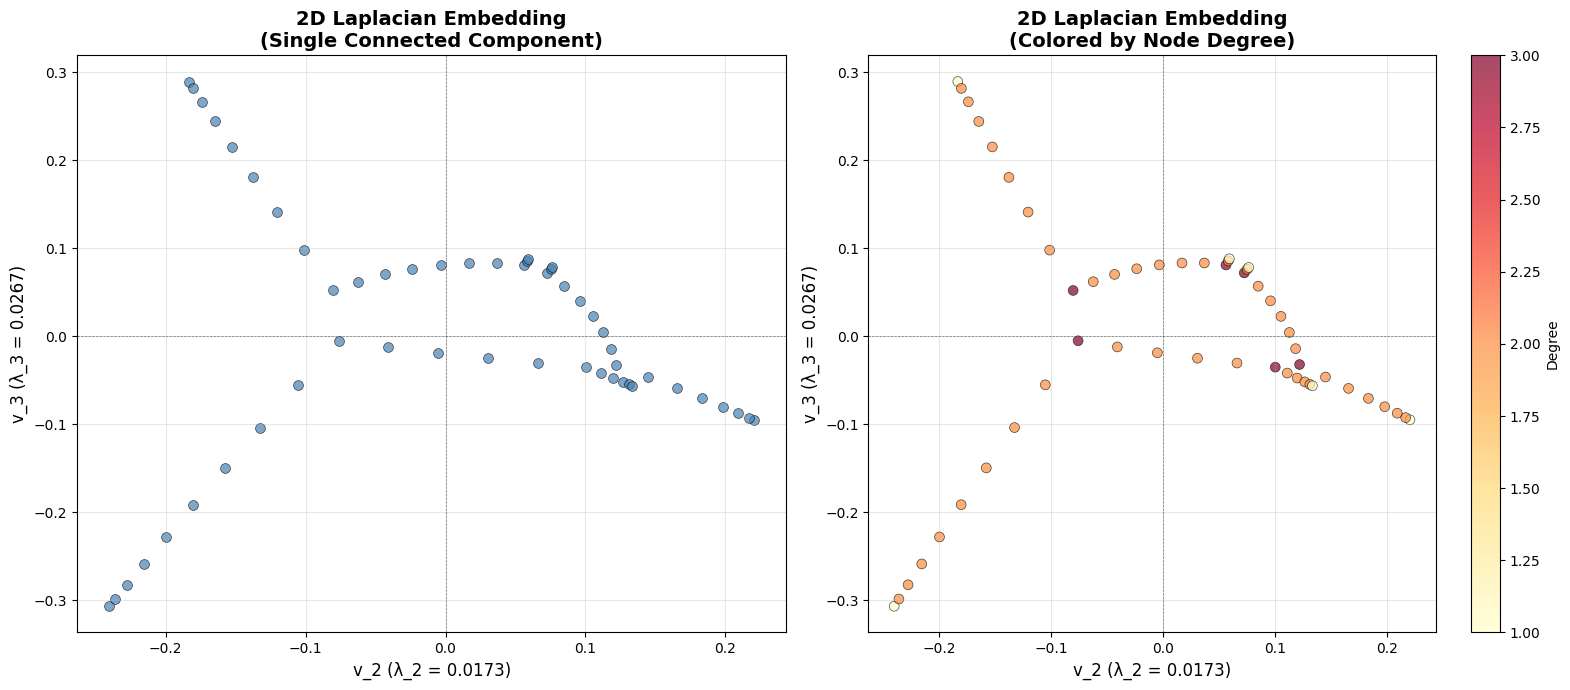


EMBEDDING ANALYSIS

Embedding coordinate statistics:
  v_2 (X-axis):
    - Range: [-0.240253, 0.220491]
    - Mean: 0.000000
    - Std: 0.136083

  v_3 (Y-axis):
    - Range: [-0.307003, 0.289656]
    - Mean: 0.000000
    - Std: 0.136083

Extreme nodes in embedding space:
  Most negative v_2: Node 1 = -0.240253
  Most positive v_2: Node 39 = 0.220491
  Most negative v_3: Node 1 = -0.307003
  Most positive v_3: Node 21 = 0.289656

------------------------------------------------------------
GRAPH PARTITIONING (Spectral Bisection)
------------------------------------------------------------

Since the graph is connected (r=1), v_2 is the Fiedler vector.
It can be used to partition the graph into two communities:
  Partition A (v_2 ≤ 0): 25 nodes
  Partition B (v_2 > 0): 29 nodes
  Cut size (edges between partitions): 2

------------------------------------------------------------
SAVING EMBEDDING
------------------------------------------------------------
Embedding coordinates saved to

In [9]:
# Q5 (d)

# Generate 2D Laplacian embedding of the nodes
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh
import numpy as np

print("=" * 60)
print("2D LAPLACIAN EMBEDDING")
print("=" * 60)

# Compute eigenpairs of the unnormalized Laplacian L
# We need enough eigenvalues to skip the zero eigenvalues
k = min(
    20, n_nodes - 1
)  # Compute more eigenvalues to ensure we get past zero eigenvalues

print(f"\nComputing {k} smallest eigenpairs of Laplacian L...")
eigenvalues_embed, eigenvectors_embed = eigsh(L, k=k, which="SM")

# Sort eigenpairs by eigenvalue (ascending order)
sorted_indices = np.argsort(eigenvalues_embed)
eigenvalues_embed = eigenvalues_embed[sorted_indices]
eigenvectors_embed = eigenvectors_embed[:, sorted_indices]

print(f"\nSmallest {min(10, k)} eigenvalues:")
for i in range(min(10, k)):
    print(f"  λ_{i + 1} = {eigenvalues_embed[i]:.8f}")

# Determine multiplicity r of λ = 0
tolerance = 1e-6
r = np.sum(eigenvalues_embed < tolerance)

print(f"\nMultiplicity of λ = 0: r = {r}")
print(f"This corresponds to {r} connected component(s)")

# Check if we have enough eigenvectors
if r + 2 > k:
    print(f"\nWarning: Need to compute more eigenvectors!")
    k_new = r + 5
    print(f"Recomputing with k = {k_new}...")
    eigenvalues_embed, eigenvectors_embed = eigsh(L, k=k_new, which="SM")
    sorted_indices = np.argsort(eigenvalues_embed)
    eigenvalues_embed = eigenvalues_embed[sorted_indices]
    eigenvectors_embed = eigenvectors_embed[:, sorted_indices]

# Extract v_{r+1} and v_{r+2} for 2D embedding
v_r_plus_1 = eigenvectors_embed[:, r]  # (r+1)-th eigenvector (index r)
v_r_plus_2 = eigenvectors_embed[:, r + 1]  # (r+2)-th eigenvector (index r+1)

lambda_r_plus_1 = eigenvalues_embed[r]
lambda_r_plus_2 = eigenvalues_embed[r + 1]

print(f"\nUsing eigenvectors corresponding to:")
print(f"  λ_{r + 1} = {lambda_r_plus_1:.6f} (Fiedler value if r=1)")
print(f"  λ_{r + 2} = {lambda_r_plus_2:.6f}")

# Create 2D embedding coordinates
embedding_2d = np.column_stack([v_r_plus_1, v_r_plus_2])

print(f"\n2D Embedding shape: {embedding_2d.shape}")
print(f"  X-axis: v_{r + 1} (eigenvector {r + 1})")
print(f"  Y-axis: v_{r + 2} (eigenvector {r + 2})")

# ============================================================
# VISUALIZATION
# ============================================================
print("\n" + "-" * 60)
print("CREATING VISUALIZATION")
print("-" * 60)

# Create figure with multiple subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# -------------------- Plot 1: Basic embedding --------------------
ax1 = axes[0]

# Color nodes by their connected component
if num_components_actual > 1:
    scatter = ax1.scatter(
        embedding_2d[:, 0],
        embedding_2d[:, 1],
        c=labels,
        cmap="tab10",
        s=50,
        alpha=0.7,
        edgecolors="black",
        linewidth=0.5,
    )
    ax1.set_title(
        f"2D Laplacian Embedding\n(Colored by Connected Component)",
        fontsize=14,
        fontweight="bold",
    )
    plt.colorbar(scatter, ax=ax1, label="Component ID")
else:
    scatter = ax1.scatter(
        embedding_2d[:, 0],
        embedding_2d[:, 1],
        c="steelblue",
        s=50,
        alpha=0.7,
        edgecolors="black",
        linewidth=0.5,
    )
    ax1.set_title(
        f"2D Laplacian Embedding\n(Single Connected Component)",
        fontsize=14,
        fontweight="bold",
    )

ax1.set_xlabel(f"v_{r + 1} (λ_{r + 1} = {lambda_r_plus_1:.4f})", fontsize=12)
ax1.set_ylabel(f"v_{r + 2} (λ_{r + 2} = {lambda_r_plus_2:.4f})", fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color="k", linestyle="--", linewidth=0.5, alpha=0.5)
ax1.axvline(x=0, color="k", linestyle="--", linewidth=0.5, alpha=0.5)

# -------------------- Plot 2: Embedding colored by degree --------------------
ax2 = axes[1]

scatter2 = ax2.scatter(
    embedding_2d[:, 0],
    embedding_2d[:, 1],
    c=degrees,
    cmap="YlOrRd",
    s=50,
    alpha=0.7,
    edgecolors="black",
    linewidth=0.5,
)
ax2.set_title(
    "2D Laplacian Embedding\n(Colored by Node Degree)", fontsize=14, fontweight="bold"
)
ax2.set_xlabel(f"v_{r + 1} (λ_{r + 1} = {lambda_r_plus_1:.4f})", fontsize=12)
ax2.set_ylabel(f"v_{r + 2} (λ_{r + 2} = {lambda_r_plus_2:.4f})", fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color="k", linestyle="--", linewidth=0.5, alpha=0.5)
ax2.axvline(x=0, color="k", linestyle="--", linewidth=0.5, alpha=0.5)
plt.colorbar(scatter2, ax=ax2, label="Degree")

plt.tight_layout()
plt.savefig("laplacian_embedding_2d.png", dpi=300, bbox_inches="tight")
print("Saved: laplacian_embedding_2d.png")
plt.show()

# ============================================================
# ADDITIONAL ANALYSIS
# ============================================================
print("\n" + "=" * 60)
print("EMBEDDING ANALYSIS")
print("=" * 60)

# Statistics of embedding coordinates
print(f"\nEmbedding coordinate statistics:")
print(f"  v_{r + 1} (X-axis):")
print(f"    - Range: [{v_r_plus_1.min():.6f}, {v_r_plus_1.max():.6f}]")
print(f"    - Mean: {v_r_plus_1.mean():.6f}")
print(f"    - Std: {v_r_plus_1.std():.6f}")
print(f"\n  v_{r + 2} (Y-axis):")
print(f"    - Range: [{v_r_plus_2.min():.6f}, {v_r_plus_2.max():.6f}]")
print(f"    - Mean: {v_r_plus_2.mean():.6f}")
print(f"    - Std: {v_r_plus_2.std():.6f}")

# Identify nodes at extremes (potential boundary/peripheral nodes)
print(f"\nExtreme nodes in embedding space:")

# Most negative v_{r+1}
idx_min_x = np.argmin(v_r_plus_1)
print(
    f"  Most negative v_{r + 1}: Node {idx_to_node_id[idx_min_x]} = {v_r_plus_1[idx_min_x]:.6f}"
)

# Most positive v_{r+1}
idx_max_x = np.argmax(v_r_plus_1)
print(
    f"  Most positive v_{r + 1}: Node {idx_to_node_id[idx_max_x]} = {v_r_plus_1[idx_max_x]:.6f}"
)

# Most negative v_{r+2}
idx_min_y = np.argmin(v_r_plus_2)
print(
    f"  Most negative v_{r + 2}: Node {idx_to_node_id[idx_min_y]} = {v_r_plus_2[idx_min_y]:.6f}"
)

# Most positive v_{r+2}
idx_max_y = np.argmax(v_r_plus_2)
print(
    f"  Most positive v_{r + 2}: Node {idx_to_node_id[idx_max_y]} = {v_r_plus_2[idx_max_y]:.6f}"
)

# If graph is connected (r=1), the first eigenvector (Fiedler vector) can be used for graph partitioning
if r == 1:
    print(f"\n" + "-" * 60)
    print("GRAPH PARTITIONING (Spectral Bisection)")
    print("-" * 60)
    print(f"\nSince the graph is connected (r=1), v_2 is the Fiedler vector.")
    print(f"It can be used to partition the graph into two communities:")

    # Partition based on sign of Fiedler vector
    partition = (v_r_plus_1 > 0).astype(int)
    partition_sizes = np.bincount(partition)

    print(f"  Partition A (v_2 ≤ 0): {partition_sizes[0]} nodes")
    print(f"  Partition B (v_2 > 0): {partition_sizes[1]} nodes")

    # Count edges between partitions (cut size)
    cut_edges = 0
    for i in range(n_nodes):
        for j in range(i + 1, n_nodes):
            if A[i, j] > 0 and partition[i] != partition[j]:
                cut_edges += 1

    print(f"  Cut size (edges between partitions): {cut_edges}")

# Save embedding coordinates
print("\n" + "-" * 60)
print("SAVING EMBEDDING")
print("-" * 60)

embedding_df = pd.DataFrame(
    {
        "Node_ID": [idx_to_node_id[i] for i in range(n_nodes)],
        "X_coordinate": v_r_plus_1,
        "Y_coordinate": v_r_plus_2,
        "Degree": degrees,
        "Component": labels,
    }
)

embedding_df.to_csv("laplacian_embedding_2d.csv", index=False)
print("Embedding coordinates saved to 'laplacian_embedding_2d.csv'")

# ============================================================
# INTERPRETATION
# ============================================================
print("\n" + "=" * 60)
print("INTERPRETATION")
print("=" * 60)

print(f"""
LAPLACIAN EMBEDDING:
- Maps nodes from graph structure to 2D Euclidean space
- Preserves graph structure: nearby nodes in graph → nearby points in embedding
- Uses eigenvectors v_{r + 1} and v_{r + 2} of Laplacian matrix

WHY SKIP THE FIRST r EIGENVECTORS?
- First r eigenvectors correspond to eigenvalue 0
- They encode connected components (constant within each component)
- Not useful for embedding within components
- r = {r} in this graph ({r} connected component{"s" if r != 1 else ""})

PROPERTIES:
- Nodes in same community tend to cluster together
- Distance in embedding ≈ graph distance
- Useful for visualization, clustering, and graph partitioning

FIEDLER VECTOR (if r=1):
- v_2 (second eigenvector) is called the Fiedler vector
- Sign of Fiedler vector partitions graph into two communities
- Minimizes the cut size (edges between partitions)
- Foundation of spectral clustering algorithms

APPLICATIONS:
- Network visualization
- Community detection
- Graph partitioning
- Dimensionality reduction for graph data
""")

print("\n" + "=" * 60)
print("SUMMARY")
print("=" * 60)
print(f"""
2D Laplacian Embedding Generated:
- Using eigenvectors v_{r + 1} and v_{r + 2} where r = {r}
- Corresponding eigenvalues: λ_{r + 1} = {lambda_r_plus_1:.6f}, λ_{r + 2} = {lambda_r_plus_2:.6f}
- Embedding saved to: laplacian_embedding_2d.csv
- Visualization saved to: laplacian_embedding_2d.png
- Total nodes embedded: {n_nodes}
""")


K-MEANS CLUSTERING ON LAPLACIAN EMBEDDING

Determining optimal number of clusters...

Chosen k = 4
Silhouette score: 0.5453

Justification: k=4 maximizes the silhouette score, indicating
well-separated and cohesive clusters in the embedding space.

Applying k-means with k = 4...

Cluster sizes:
  Cluster 0: 7 nodes (13.0%)
  Cluster 1: 21 nodes (38.9%)
  Cluster 2: 8 nodes (14.8%)
  Cluster 3: 18 nodes (33.3%)

Creating visualizations...

Saved: kmeans_clustering.png


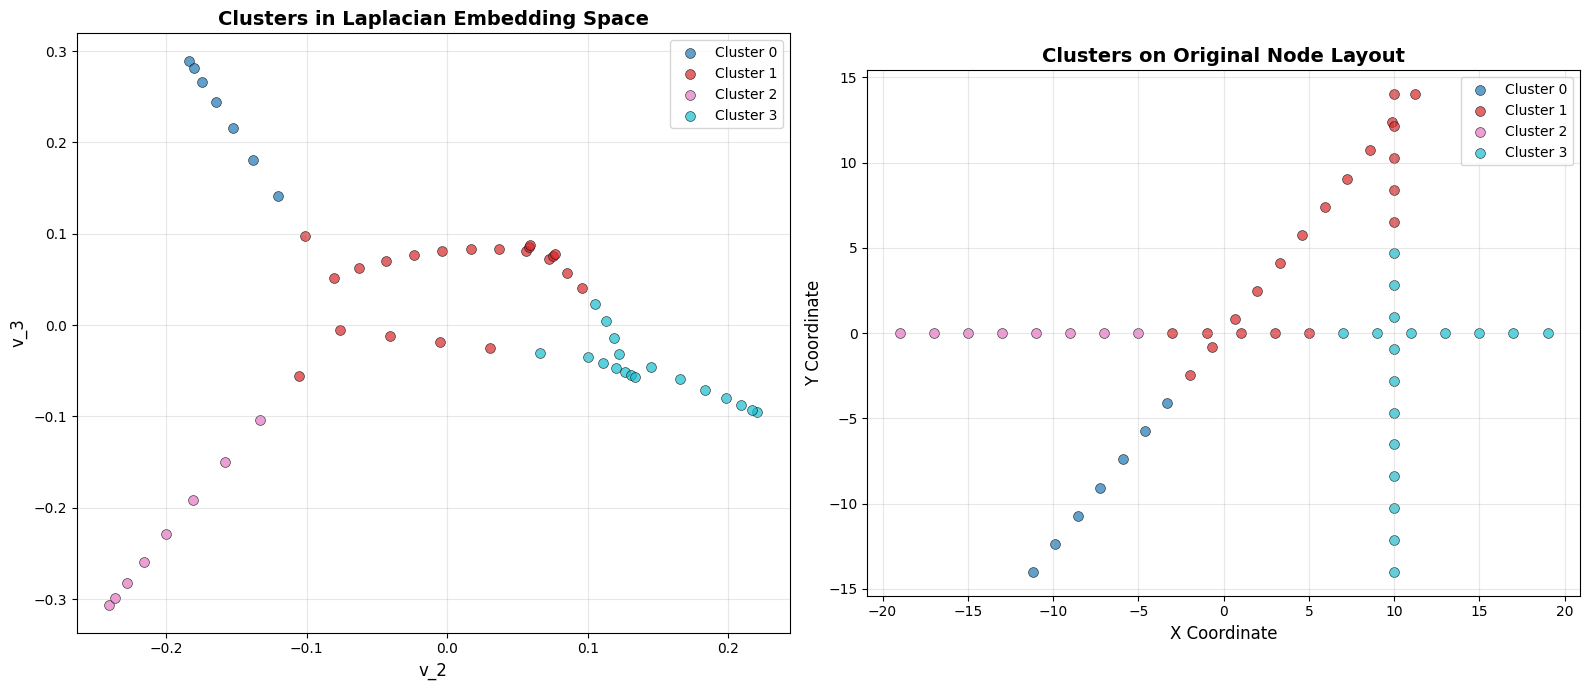

Clustering results saved to 'kmeans_clustering_results.csv'

DONE


In [11]:
# Q5 (e)

# K-means clustering on 2D Laplacian embedding and visualization
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

print("=" * 60)
print("K-MEANS CLUSTERING ON LAPLACIAN EMBEDDING")
print("=" * 60)

# ============================================================
# STEP 1: DETERMINE OPTIMAL NUMBER OF CLUSTERS
# ============================================================
print("\nDetermining optimal number of clusters...")

# Test different values of k
k_range = range(2, 11)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(embedding_2d)
    silhouette = silhouette_score(embedding_2d, cluster_labels)
    silhouette_scores.append(silhouette)

# Choose k with best silhouette score
k_optimal = list(k_range)[np.argmax(silhouette_scores)]
best_silhouette = max(silhouette_scores)

print(f"\nChosen k = {k_optimal}")
print(f"Silhouette score: {best_silhouette:.4f}")
print(f"\nJustification: k={k_optimal} maximizes the silhouette score, indicating")
print(f"well-separated and cohesive clusters in the embedding space.")

# ============================================================
# STEP 2: APPLY K-MEANS WITH CHOSEN k
# ============================================================
print(f"\nApplying k-means with k = {k_optimal}...")

kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=20)
final_clusters = kmeans_final.fit_predict(embedding_2d)

# Cluster statistics
cluster_sizes = np.bincount(final_clusters)
print(f"\nCluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"  Cluster {i}: {size} nodes ({100 * size / n_nodes:.1f}%)")

# ============================================================
# STEP 3: VISUALIZATION
# ============================================================
print("\nCreating visualizations...")

# Get original (x, y) coordinates from transit_nodes.csv
original_coords = nodes_df[["x", "y"]].values

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Define color palette
colors = plt.cm.tab10(np.linspace(0, 1, k_optimal))

# -------------------- Plot 1: Clusters in Embedding Space --------------------
ax1 = axes[0]
for i in range(k_optimal):
    mask = final_clusters == i
    ax1.scatter(
        embedding_2d[mask, 0],
        embedding_2d[mask, 1],
        c=[colors[i]],
        label=f"Cluster {i}",
        s=50,
        alpha=0.7,
        edgecolors="black",
        linewidth=0.5,
    )

ax1.set_xlabel(f"v_{r + 1}", fontsize=12)
ax1.set_ylabel(f"v_{r + 2}", fontsize=12)
ax1.set_title("Clusters in Laplacian Embedding Space", fontsize=14, fontweight="bold")
ax1.legend(loc="best", fontsize=10)
ax1.grid(True, alpha=0.3)

# -------------------- Plot 2: Clusters on Original Node Layout --------------------
ax2 = axes[1]
for i in range(k_optimal):
    mask = final_clusters == i
    ax2.scatter(
        original_coords[mask, 0],
        original_coords[mask, 1],
        c=[colors[i]],
        label=f"Cluster {i}",
        s=50,
        alpha=0.7,
        edgecolors="black",
        linewidth=0.5,
    )

ax2.set_xlabel("X Coordinate", fontsize=12)
ax2.set_ylabel("Y Coordinate", fontsize=12)
ax2.set_title("Clusters on Original Node Layout", fontsize=14, fontweight="bold")
ax2.legend(loc="best", fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_aspect("equal", adjustable="box")

plt.tight_layout()
plt.savefig("kmeans_clustering.png", dpi=300, bbox_inches="tight")
print("\nSaved: kmeans_clustering.png")
plt.show()

# Save clustering results
clustering_results = pd.DataFrame(
    {
        "Node_ID": [idx_to_node_id[i] for i in range(n_nodes)],
        "Cluster": final_clusters,
        "X_original": original_coords[:, 0],
        "Y_original": original_coords[:, 1],
        "X_embedding": embedding_2d[:, 0],
        "Y_embedding": embedding_2d[:, 1],
    }
)

clustering_results.to_csv("kmeans_clustering_results.csv", index=False)
print("Clustering results saved to 'kmeans_clustering_results.csv'")

print("\n" + "=" * 60)
print("DONE")
print("=" * 60)
